In [1]:
import pandas as pd

In [2]:
# import data, skiprows=1 karena data di csv mulai dari baris ke-2
df = pd.read_csv("Dataset-PT.csv",skiprows=1)

In [3]:
df.head()

,Calendar_date,route_id,bus_id,stop_sequence,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,...,factor(weather)Rain,factor(weather)Snow,factor(temperature)Cold,factor(temperature)Extra_cold,factor(temperature)Normal,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak
0,20220108,4,41344,1,151,0,0,120,100,100,...,0,0,0,0,1,0,1,0,0,1
1,20220108,4,41344,2,185,24,171,45,151,100,...,0,0,0,0,1,0,1,0,0,1
2,20220108,4,41344,3,186,0,55,41,185,100,...,0,0,0,0,1,0,1,0,0,1
3,20220108,4,41344,4,202,12,42,94,186,100,...,0,0,0,0,1,0,1,0,0,1
4,20220108,4,41344,5,242,21,98,86,202,100,...,0,0,0,0,1,0,1,0,0,1


In [4]:
df.columns

Index(['Calendar_date', 'route_id', 'bus_id', 'stop_sequence', 'arrival_delay',
       'dwell_time', 'travel_time_for_previous_section',
       'scheduled_travel_time', 'upstream_stop_delay', 'origin_delay',
       'previous_bus_delay', 'previous_trip_travel_time', 'traffic_condition',
       'recurrent_delay', 'weather', 'temperature', 'day_of_week',
       'time_of_day', 'factor(weather)Light_Rain', 'factor(weather)Light_Snow',
       'factor(weather)Normal', 'factor(weather)Rain', 'factor(weather)Snow',
       'factor(temperature)Cold', 'factor(temperature)Extra_cold',
       'factor(temperature)Normal', 'factor(day_of_week)weekday',
       'factor(day_of_week)weekend', 'factor(time_of_day)Afternoon_peak',
       'factor(time_of_day)Morning_peak', 'factor(time_of_day)Off-peak'],
      dtype='object')

In [5]:
df.shape

(545103, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545103 entries, 0 to 545102
Data columns (total 31 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Calendar_date                      545103 non-null  int64  
 1   route_id                           545103 non-null  int64  
 2   bus_id                             545103 non-null  int64  
 3   stop_sequence                      545103 non-null  int64  
 4   arrival_delay                      545103 non-null  int64  
 5   dwell_time                         545103 non-null  int64  
 6   travel_time_for_previous_section   545103 non-null  int64  
 7   scheduled_travel_time              545103 non-null  int64  
 8   upstream_stop_delay                545103 non-null  int64  
 9   origin_delay                       545103 non-null  int64  
 10  previous_bus_delay                 545103 non-null  int64  
 11  previous_trip_travel_time          5451

## EDA

In [7]:
# Mean, Median, and Standard Deviation of arrival_delay
mean_delay = df['arrival_delay'].mean()
median_delay = df['arrival_delay'].median()
std_delay = df['arrival_delay'].std()

print(f"Mean Delay: {mean_delay}")
print(f"Median Delay: {median_delay}")
print(f"Standard Deviation: {std_delay}")


Mean Delay: 134.9722382742344
Median Delay: 88.0
Standard Deviation: 193.89948727756183


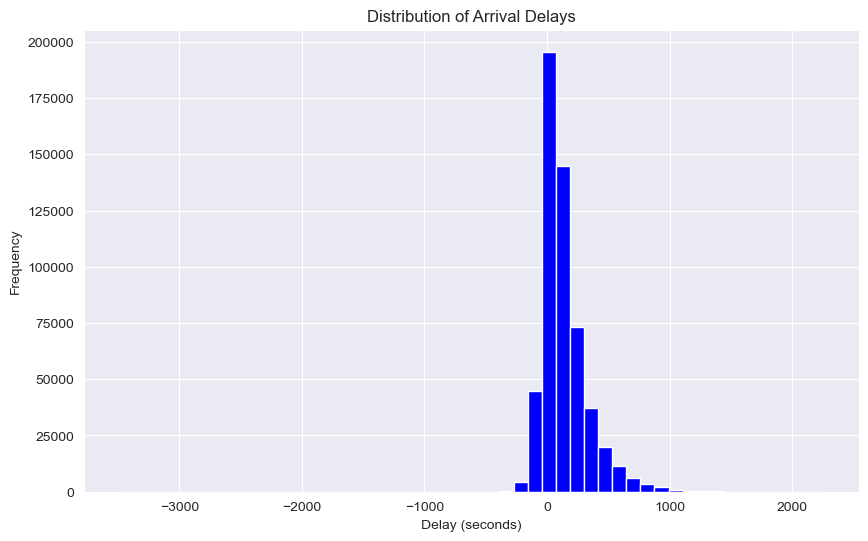

In [8]:
import matplotlib.pyplot as plt

# Assuming 'arrival_delay' column exists in the dataset
plt.figure(figsize=(10, 6))

# Creating a histogram to show the distribution of arrival delays
plt.hist(df['arrival_delay'], bins=50, color='blue')

# Adding titles and labels
plt.title('Distribution of Arrival Delays')
plt.xlabel('Delay (seconds)')
plt.ylabel('Frequency')

# Display the plot
plt.grid(True)
plt.show()


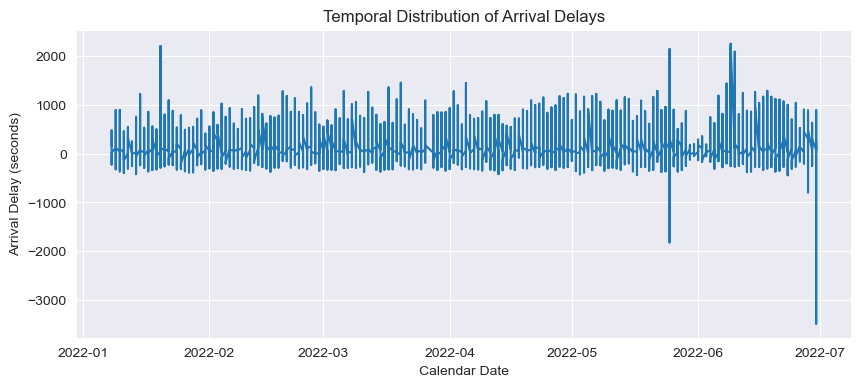

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Calendar_date' column to datetime format if it's not already
df['Calendar_date'] = pd.to_datetime(df['Calendar_date'], format='%Y%m%d')

# Plot for arrival_delay over time
plt.figure(figsize=(10, 4))
plt.plot(df['Calendar_date'], df['arrival_delay'], label='Arrival Delay')
plt.title('Temporal Distribution of Arrival Delays')
plt.xlabel('Calendar Date')
plt.ylabel('Arrival Delay (seconds)')
plt.grid(True)
plt.show()


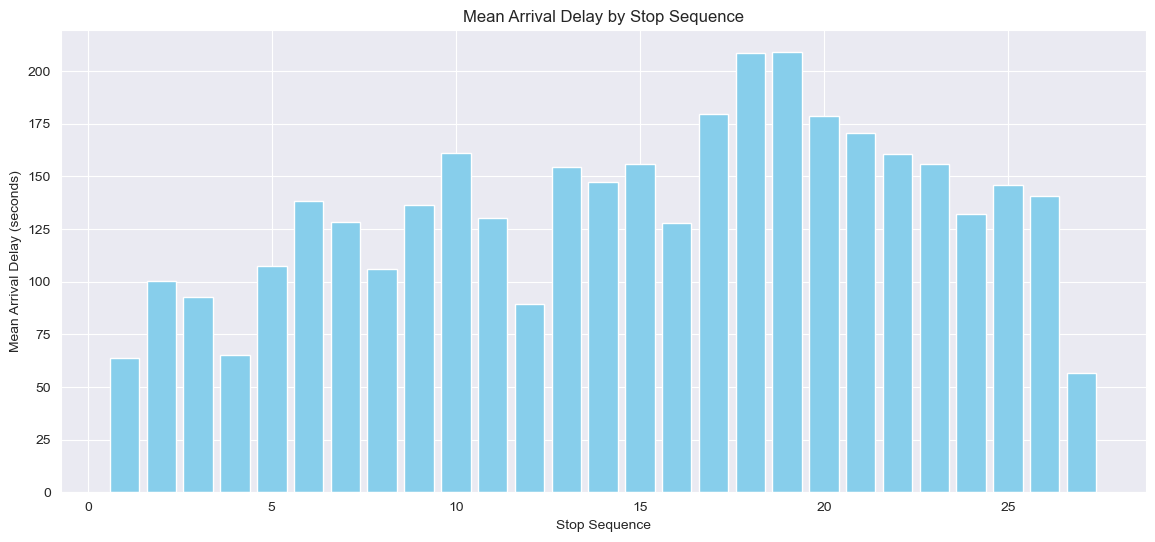

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by stop_sequence and calculate the mean delay for each stop
stop_delay = df.groupby('stop_sequence')['arrival_delay'].mean().reset_index()

# Sort the values for better visualization
stop_delay = stop_delay.sort_values(by='stop_sequence')

# Plotting the mean arrival delay by stop sequence (x-axis)
plt.figure(figsize=(14, 6))
plt.bar(stop_delay['stop_sequence'], stop_delay['arrival_delay'], color='skyblue')

# Adding labels and title
plt.xlabel('Stop Sequence')
plt.ylabel('Mean Arrival Delay (seconds)')
plt.title('Mean Arrival Delay by Stop Sequence')
plt.xticks()  # Rotate x-axis labels if there are many stop sequences

# Display the grid and the plot
plt.grid(True)
plt.show()


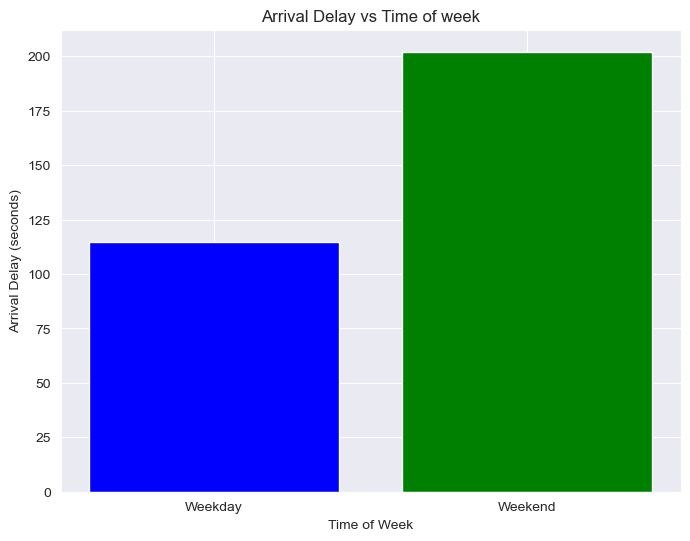

Mean Arrival Delay on Weekday: 114.58902448648688
Mean Arrival Delay on Weekend: 202.10852749814893


In [20]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculating the median arrival delay for weekday and weekend
median_weekday = df[df['factor(day_of_week)weekday'] == 1]['arrival_delay'].mean()
median_weekend = df[df['factor(day_of_week)weekend'] == 1]['arrival_delay'].mean()

# Creating a bar chart to compare median arrival delay for weekday and weekend
plt.figure(figsize=(8, 6))
plt.bar(['Weekday', 'Weekend'], [median_weekday, median_weekend], color=['blue', 'green'])

# Adding labels and title
plt.xlabel('Time of Week')
plt.ylabel('Arrival Delay (seconds)')
plt.title('Arrival Delay vs Time of week')

# Display the grid and the plot
plt.grid(True)
plt.show()
print(f"Mean Arrival Delay on Weekday: {median_weekday}")
print(f"Mean Arrival Delay on Weekend: {median_weekend}")

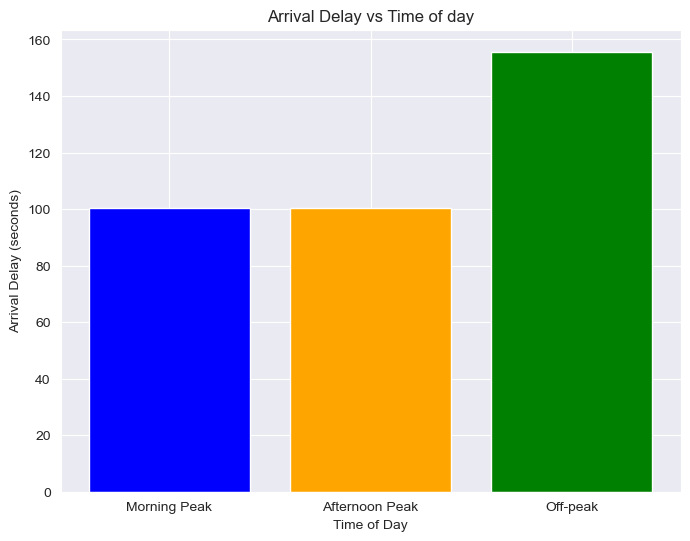

Mean Arrival Delay during Morning Peak: 100.34523769789615
Mean Arrival Delay during Afternoon Peak: 100.25489006690051
Mean Arrival Delay during Off-peak: 155.65204162017636


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculating the median arrival delay for each time of day
median_morning_peak = df[df['factor(time_of_day)Morning_peak'] == 1]['arrival_delay'].mean()
median_afternoon_peak = df[df['factor(time_of_day)Afternoon_peak'] == 1]['arrival_delay'].mean()
median_off_peak = df[df['factor(time_of_day)Off-peak'] == 1]['arrival_delay'].mean()

# Creating a bar chart to compare median arrival delay for each time of day
plt.figure(figsize=(8, 6))
plt.bar(['Morning Peak', 'Afternoon Peak', 'Off-peak'], 
        [median_morning_peak, median_afternoon_peak, median_off_peak], 
        color=['blue', 'orange', 'green'])

# Adding labels and title
plt.xlabel('Time of Day')
plt.ylabel('Arrival Delay (seconds)')
plt.title('Arrival Delay vs Time of day')

# Display the grid and the plot
plt.grid(True)
plt.show()

print(f"Mean Arrival Delay during Morning Peak: {median_morning_peak}")
print(f"Mean Arrival Delay during Afternoon Peak: {median_afternoon_peak}")
print(f"Mean Arrival Delay during Off-peak: {median_off_peak}")